In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_poke = pd.read_excel('pokemon_data_tratado.xlsx')
df_poke

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,0
4,4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32,0
1031,1031,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65,0
1032,1032,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40,0
1033,1033,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60,0


In [3]:
x = df_poke.drop(labels='Is_legendary', axis=1)
y = df_poke['Is_legendary'].values

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column_name in x:
    column_dtype = x[column_name].dtype
    if column_dtype == 'object':
        x[column_name] = label_encoder.fit_transform(x[column_name])

df_testinho = pd.DataFrame(x)
display(df_testinho)

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,1,91,9,13,318,45,49,49,65,65,45
1,1,2,427,9,13,405,60,62,63,80,80,60
2,2,3,959,9,13,525,80,82,83,100,100,80
3,3,4,118,6,6,309,39,52,43,60,50,65
4,4,5,119,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,618,864,10,16,471,109,81,99,66,84,32
1031,1031,628,82,14,7,510,110,83,70,112,70,65
1032,1032,705,815,16,2,452,58,75,83,83,113,40
1033,1033,706,347,16,2,600,80,100,100,110,150,60


In [5]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

preprocessador = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('Standard', StandardScaler(), make_column_selector(dtype_include=['float']))])

x_pre = preprocessador.fit_transform(x)
display(x_pre)

array([[   0,    1,   91, ...,   65,   65,   45],
       [   1,    2,  427, ...,   80,   80,   60],
       [   2,    3,  959, ...,  100,  100,   80],
       ...,
       [1032,  705,  815, ...,   83,  113,   40],
       [1033,  706,  347, ...,  110,  150,   60],
       [1034,  724,  189, ...,   95,   95,   60]], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_pre,y,random_state=0, test_size=0.3)

In [7]:
from sklearn import tree

classificador_gini = tree.DecisionTreeClassifier(criterion='gini')

classificador_gini.fit(x_treino, y_treino)

DecisionTreeClassifier()

[Text(0.4322916666666667, 0.9375, 'Total <= 568.5\ngini = 0.15\nsamples = 724\nvalue = [665, 59]\nclass = 0'),
 Text(0.16666666666666666, 0.8125, 'Total <= 202.5\ngini = 0.009\nsamples = 652\nvalue = [649, 3]\nclass = 0'),
 Text(0.08333333333333333, 0.6875, 'Sp. Atk <= 27.0\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = 0'),
 Text(0.041666666666666664, 0.5625, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 0'),
 Text(0.125, 0.5625, 'Total <= 192.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.08333333333333333, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.16666666666666666, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.25, 0.6875, 'HP <= 94.0\ngini = 0.006\nsamples = 641\nvalue = [639, 2]\nclass = 0'),
 Text(0.20833333333333334, 0.5625, 'gini = 0.0\nsamples = 566\nvalue = [566, 0]\nclass = 0'),
 Text(0.2916666666666667, 0.5625, 'Pokedex ID <= 761.0\ngini = 0.052\nsamples = 75\nvalue = [73, 2]\nclass = 0'),


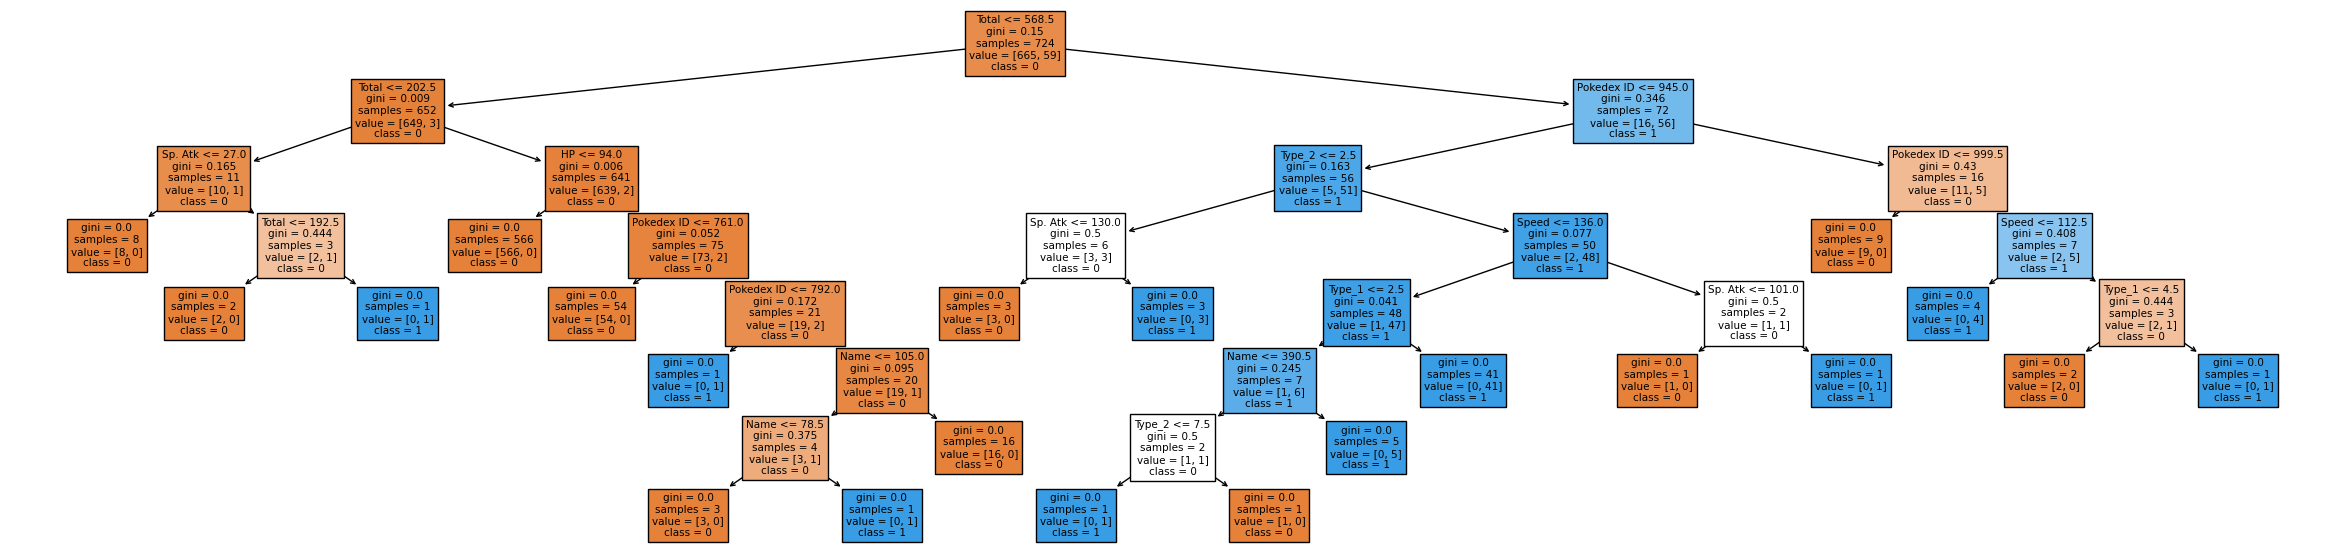

In [8]:
plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_gini,
    feature_names=x.columns.astype(str),
    class_names=classificador_gini.classes_.astype(str),
    filled=True
)

In [9]:
from sklearn.metrics import accuracy_score

resp_treino_gini = classificador_gini.predict(x_treino)

print('Gini:', accuracy_score(y_treino, resp_treino_gini))

Gini: 1.0


<AxesSubplot: >

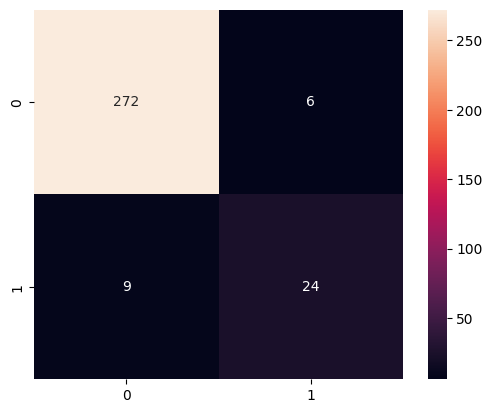

In [10]:
y_pred = classificador_gini.predict(x_teste)

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_gini.classes_, xticklabels = classificador_gini.classes_,fmt = 'd')

In [11]:
path = classificador_gini.cost_complexity_pruning_path(x_treino, y_treino)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.00090163 0.00103115 0.00129949 0.00184162 0.00210471
 0.00363753 0.00554953 0.01230214 0.10707555]
[0.         0.00270488 0.01095404 0.01355303 0.01539465 0.01749936
 0.02477442 0.03032394 0.04262608 0.14970163]


In [13]:
from sklearn.model_selection import GridSearchCV

parametros = {'ccp_alpha': ccp_alphas}

grid = GridSearchCV(classificador_gini, parametros, cv=5)
grid.fit(x_treino, y_treino)

print(f"Melhor valor de k: {grid.best_params_['ccp_alpha']}")
print(f"Melhor classificador: {grid.best_estimator_}")
print(f"Melhor score (médio): {grid.best_score_*100:.2f}%")

classificador_gini = grid.best_estimator_
classificador_gini.fit(x_treino, y_treino)

Melhor valor de k: 0.005549526440410418
Melhor classificador: DecisionTreeClassifier(ccp_alpha=0.005549526440410418)
Melhor score (médio): 98.07%


DecisionTreeClassifier(ccp_alpha=0.005549526440410418)

[Text(0.4, 0.8333333333333334, 'Total <= 568.5\ngini = 0.15\nsamples = 724\nvalue = [665, 59]\nclass = 0'),
 Text(0.2, 0.5, 'gini = 0.009\nsamples = 652\nvalue = [649, 3]\nclass = 0'),
 Text(0.6, 0.5, 'Pokedex ID <= 945.0\ngini = 0.346\nsamples = 72\nvalue = [16, 56]\nclass = 1'),
 Text(0.4, 0.16666666666666666, 'gini = 0.163\nsamples = 56\nvalue = [5, 51]\nclass = 1'),
 Text(0.8, 0.16666666666666666, 'gini = 0.43\nsamples = 16\nvalue = [11, 5]\nclass = 0')]

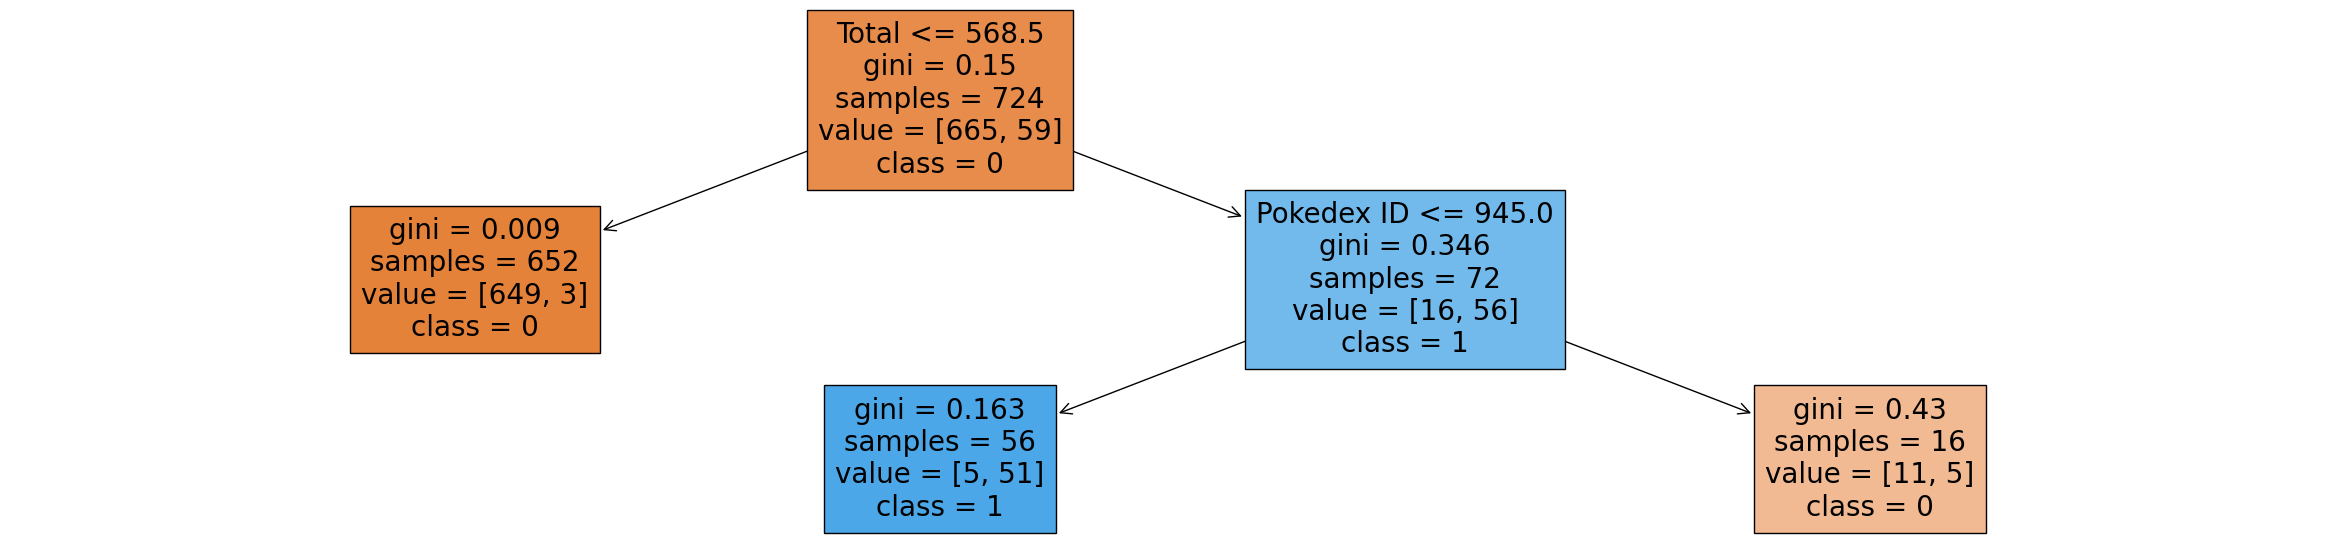

In [ ]:
alpha = grid.best_params_['ccp_alpha']

classificador_ccp = tree.DecisionTreeClassifier(ccp_alpha=alpha)
classificador_ccp.fit(x_treino, y_treino)

y_pred = classificador_ccp.predict(x_teste)

plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_ccp,
    feature_names=x.columns.astype(str),
    class_names=classificador_ccp.classes_.astype(str),
    filled=True
)

<AxesSubplot: >

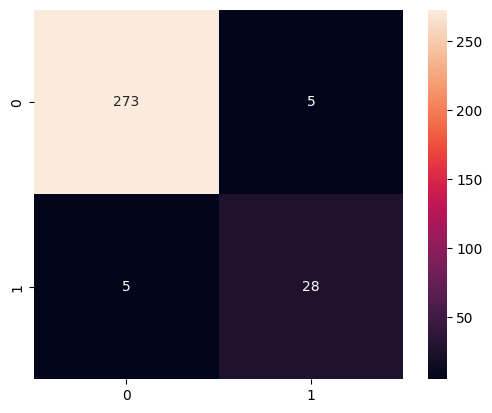

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_ccp.classes_, xticklabels = classificador_ccp.classes_,fmt = 'd')

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_teste, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       278
           1       0.85      0.85      0.85        33

    accuracy                           0.97       311
   macro avg       0.92      0.92      0.92       311
weighted avg       0.97      0.97      0.97       311

